<a href="https://colab.research.google.com/github/jsaulme/Aprendizaje_Automatico_MCD/blob/main/tareas/01_datos_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1

### Cargar conjunto de datos mediante pandas

In [ ]:
# Cargar las librerias y paquetes necesarios

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from google.colab import drive
from google.colab import files

In [ ]:
# Cargar los datos
url = 'https://raw.githubusercontent.com/jsaulme/datasets/main/Global%20Superstore%202018.csv'
data = pd.read_csv(url)
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,24599,IN-2017-CA120551-42816,22/03/2017,29/03/2017,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium
1,29465,ID-2015-BD116051-42248,01/09/2015,04/09/2015,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,18.72,Medium
2,24598,IN-2017-CA120551-42816,22/03/2017,29/03/2017,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.32,3,0.0,13.77,14.10,Medium


In [ ]:
data.shape

(51290, 24)

### Especificar el tipo de datos de cada columna

In [ ]:
# Obtener el tipo de datos de cada columna
data.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Postal Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Product Name       object
Sub-Category       object
Category           object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [ ]:
# Modificar tipos de datos
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Manejar valores faltantes antes de cambiar el tipo.
# Llenar con 0, pero de ser necesario se pouede usar una estretegia diferente
data['Postal Code'] = data['Postal Code'].fillna(0).astype(int)
data.dtypes

<ipython-input-111-9d98f009da25>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Order Date'] = pd.to_datetime(data['Order Date'])
<ipython-input-111-9d98f009da25>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Ship Date'] = pd.to_datetime(data['Ship Date'])


Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Postal Code                int64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Product Name              object
Sub-Category              object
Category                  object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

### Asignar una columna como indice

In [ ]:
#Configura una columna como indice
data.set_index('Row ID', inplace=True)

# Ordenar la columna Row Id de forma ascendente
data.sort_values(by='Row ID', inplace=True)
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,,,,,
1,MX-2017-SC2057582-43010,2017-10-02,2017-10-06,Standard Class,SC-2057582,Sonia Cooley,Consumer,0,Mexico City,Distrito Federal,...,OFF-LA-4658,"Hon File Folder Labels, Adjustable",Labels,Office Supplies,13.08,3,0.0,4.56,2.033,Medium
2,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,FUR-FU-6238,"Tenex Clock, Durable",Furnishings,Furniture,252.16,8,0.0,90.72,13.449,Medium
3,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,FUR-BO-4845,"Ikea 3-Shelf Cabinet, Mobile",Bookcases,Furniture,193.28,2,0.0,54.08,9.627,Medium


### Crear, modificar o eliminar columnas

In [ ]:
# Crear columna de año de pedido
data['Order Year'] = data['Order Date'].dt.year

# Crear columna de mes de pedido
data['Order Month'] = data['Order Date'].dt.month

# Crear columna de dia de pedido
data['Order Day'] = data['Order Date'].dt.day

# Crear columna de dia de entrega
data['Ship Day'] = data['Ship Date'].dt.day

# Crear columna de mes de entrega
data['Ship Month'] = data['Ship Date'].dt.month

# Crear columna de año de entrega
data['Ship Year'] = data['Ship Date'].dt.year

# Crear columna de tiempo de entrega
data['Delivery Time'] = (data['Ship Date'] - data['Order Date']).dt.days

data.head(3)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Ship Day,Ship Month,Ship Year,Delivery Time
Row ID,,,,,,,,,,,,,,,,,,,,,
1,MX-2017-SC2057582-43010,2017-10-02,2017-10-06,Standard Class,SC-2057582,Sonia Cooley,Consumer,0,Mexico City,Distrito Federal,...,4.56,2.033,Medium,2017,10,2,6,10,2017,4
2,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,90.72,13.449,Medium,2015,10,15,20,10,2015,5
3,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,54.08,9.627,Medium,2015,10,15,20,10,2015,5


In [ ]:
data.dtypes.sort_values()

Delivery Time              int64
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Month                 int32
Ship Day                   int32
Order Day                  int32
Order Month                int32
Order Year                 int32
Ship Year                  int32
Postal Code                int64
Quantity                   int64
Shipping Cost            float64
Profit                   float64
Discount                 float64
Sales                    float64
Order Priority            object
Order ID                  object
Sub-Category              object
Product ID                object
Market                    object
Region                    object
Country                   object
State                     object
City                      object
Segment                   object
Customer Name             object
Customer ID               object
Ship Mode                 object
Category                  object
Product Name              object
dtype: obj

### Filtrar registros

In [ ]:
# Filtrar por año
filtered_Order_Year = data[data['Order Year'] == 2015]

# Filtrar por producto
filtered_Product = data[data['Product Name'].str.contains('phone', case=False)]

# Filtrar por ventas
filtered_Sales = data[(data['Sales'] >= 100) & (data['Sales'] <= 200)]

# Filtrar por ciudad
filtered_City = data[data['City'] == 'Los Angeles']

# Filtrar por país
filtered_Country = data[data['Country'] == 'Mexico']

# Filtrar por categoría
filtered_Category = data[data['Category'] == 'Furniture']

# Filtrar por subcategoría
filtered_Sub_Category = data[data['Sub-Category'] == 'Tables']

In [ ]:
# 2015
filtered_Order_Year.head().iloc[:,23:34]

,Order Year,Order Month,Order Day,Ship Day,Ship Month,Ship Year,Delivery Time
Row ID,,,,,,,
2,2015,10,15,20,10,2015,5
3,2015,10,15,20,10,2015,5
4,2015,10,15,20,10,2015,5
5,2015,10,15,20,10,2015,5
6,2015,10,15,20,10,2015,5


In [ ]:
filtered_Product.head().iloc[:,16:26] # Contiene la palabra "phone"

,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day
Row ID,,,,,,,,,,
30,Technology,114.816,4,0.4,-49.824,5.923,Medium,2016,5,24
42,Technology,346.080,4,0.0,155.680,33.638,High,2016,6,17
58,Technology,2124.500,5,0.0,488.600,447.657,High,2014,5,16
60,Technology,391.320,9,0.0,144.720,28.183,Medium,2016,10,11
117,Technology,461.900,5,0.0,101.600,78.476,Medium,2017,11,28


In [ ]:
filtered_Sales.head().iloc[:,17:27] # Ventas entre 100 y 200

,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Ship Day
Row ID,,,,,,,,,,
3,193.280,2,0.0,54.080,9.627,Medium,2015,10,15,20
15,132.640,4,0.0,35.760,6.203,Medium,2017,10,18,23
25,181.116,9,0.4,-75.564,1.085,Medium,2015,9,26,29
28,141.288,7,0.4,-73.052,9.465,Medium,2016,5,24,31
30,114.816,4,0.4,-49.824,5.923,Medium,2016,5,24,31


In [ ]:
filtered_City.head().iloc[:,8:18] #Ciudad de Los Angeles

,City,State,Country,Region,Market,Product ID,Product Name,Sub-Category,Category,Sales
Row ID,,,,,,,,,,
31299,Los Angeles,California,United States,Western US,USCA,OFF-LA-5976,Self-Adhesive Address Labels for Typewriters b...,Labels,Office Supplies,14.620
31302,Los Angeles,California,United States,Western US,USCA,FUR-FU-4052,Eldon Expressions Wood and Plastic Desk Access...,Furnishings,Furniture,48.860
31303,Los Angeles,California,United States,Western US,USCA,OFF-AR-5300,Newell 322,Art,Office Supplies,7.280
31304,Los Angeles,California,United States,Western US,USCA,TEC-PH-5240,Mitel 5320 IP Phone VoIP phone,Phones,Technology,907.152
31305,Los Angeles,California,United States,Western US,USCA,OFF-BI-3983,DXL Angle-View Binders with Locking Rings by S...,Binders,Office Supplies,18.504


In [ ]:
filtered_Country.head().iloc[:,10:20] # Pais Mexico

,Country,Region,Market,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount
Row ID,,,,,,,,,,
1,Mexico,Central America,LATAM,OFF-LA-4658,"Hon File Folder Labels, Adjustable",Labels,Office Supplies,13.08000,3,0.000
21,Mexico,Central America,LATAM,FUR-CH-4682,"Hon Rocking Chair, Black",Chairs,Furniture,273.47200,4,0.200
25,Mexico,Central America,LATAM,FUR-FU-3928,"Deflect-O Clock, Black",Furnishings,Furniture,181.11600,9,0.400
26,Mexico,Central America,LATAM,TEC-CO-4765,"HP Copy Machine, Color",Copiers,Technology,326.18632,2,0.002
27,Mexico,Central America,LATAM,OFF-ST-5688,"Rogers Box, Single Width",Storage,Office Supplies,80.00000,5,0.000


### Crear grupos de datos con solo 1 columna

<Axes: xlabel='Market'>

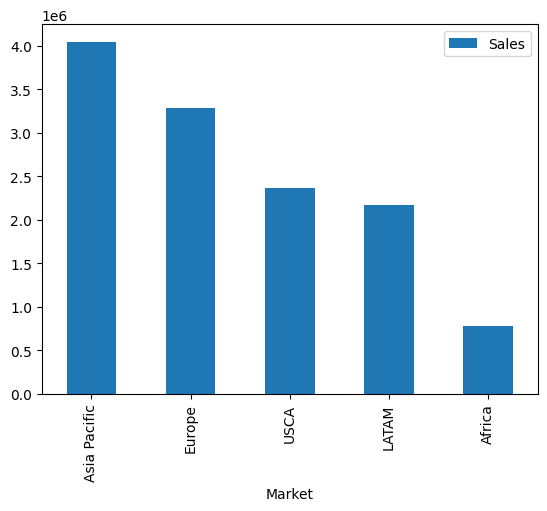

In [ ]:
grouped_Market = data.groupby('Market').agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)
# Crear un gráfico de barras
grouped_Market.plot(kind='bar')

<Axes: xlabel='Region'>

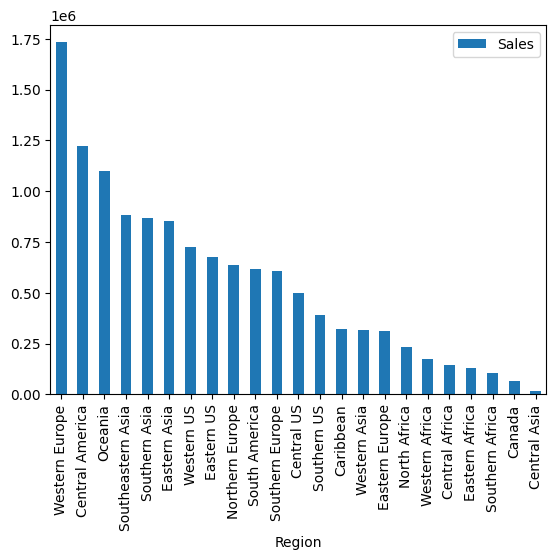

In [ ]:
grouped_Region = data.groupby('Region').agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)
# Crear un gráfico de barras
grouped_Region.plot(kind='bar')

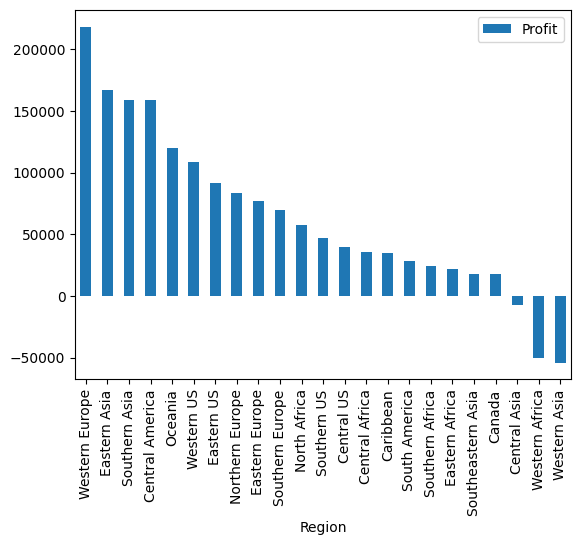

In [ ]:
#             Eje X               Eje Y
data.groupby("Region").agg({'Profit': 'sum'}).sort_values('Profit', ascending=False).plot(kind='bar')
plt.show() # Display the plot

<Figure size 2000x400 with 0 Axes>

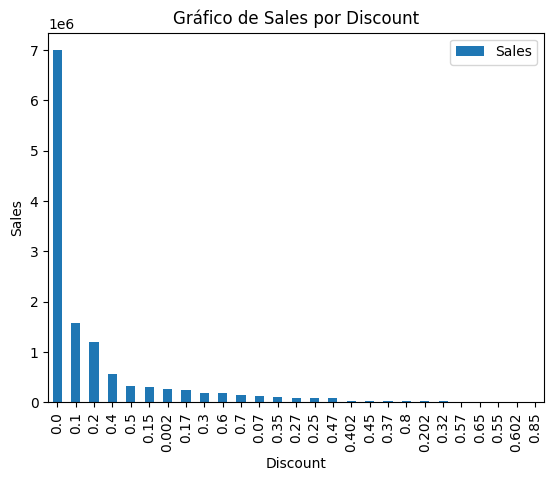

<Figure size 2000x400 with 0 Axes>

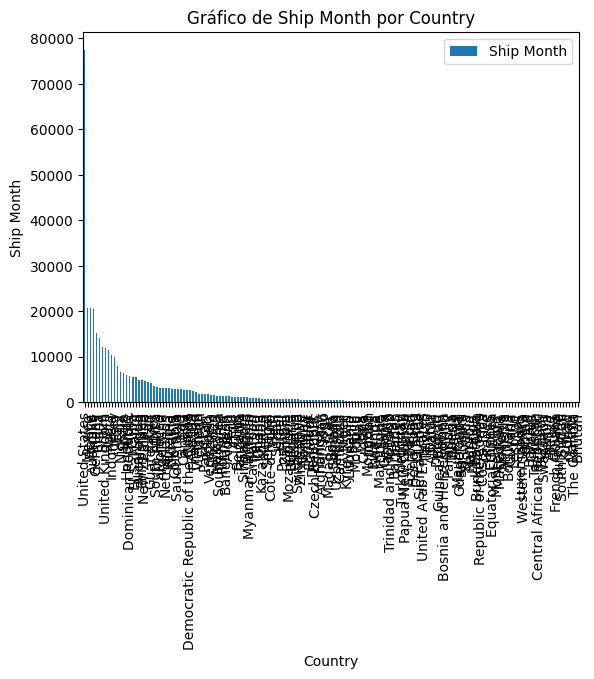

<Figure size 2000x400 with 0 Axes>

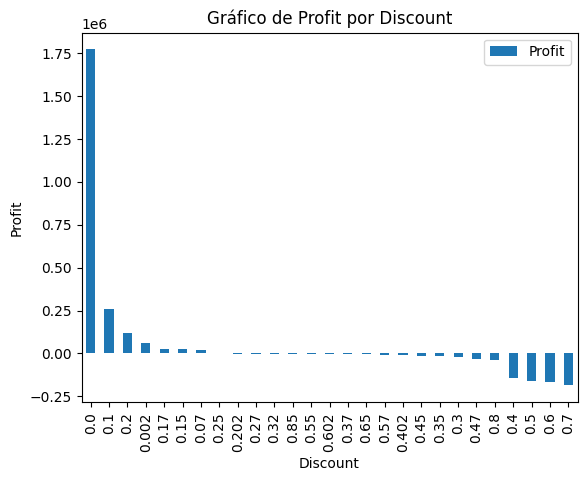

In [ ]:
# Lista de columnas numéricas a considerar
columnas_numericas = data.select_dtypes(include=['number']).columns

# Iterar y generar combinaciones aleatorias
for _ in range(3):  # Genera 3 combinaciones aleatorias, ajusta según sea necesario
    columna_x = random.choice(data.columns)
    columna_y = random.choice([col for col in columnas_numericas if col != columna_x])

    # Crear figura con tamaño 20x4
    plt.figure(figsize=(20, 4))

    # Agrupar y graficar
    data.groupby(columna_x).agg({columna_y: 'sum'}).sort_values(columna_y, ascending=False).plot(kind='bar')
    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    plt.title(f"Gráfico de {columna_y} por {columna_x}")
    plt.show()

### Crear sub-grupos con 2 o mas columnas

<Axes: xlabel='Market'>

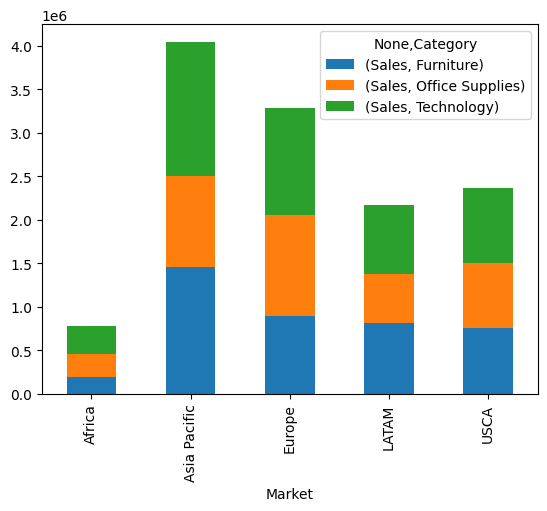

In [ ]:
grouped_Market_Category = data.groupby(['Market', 'Category']).agg({'Sales': 'sum'})
grouped_Market_Category.unstack().plot(kind='bar', stacked=True)

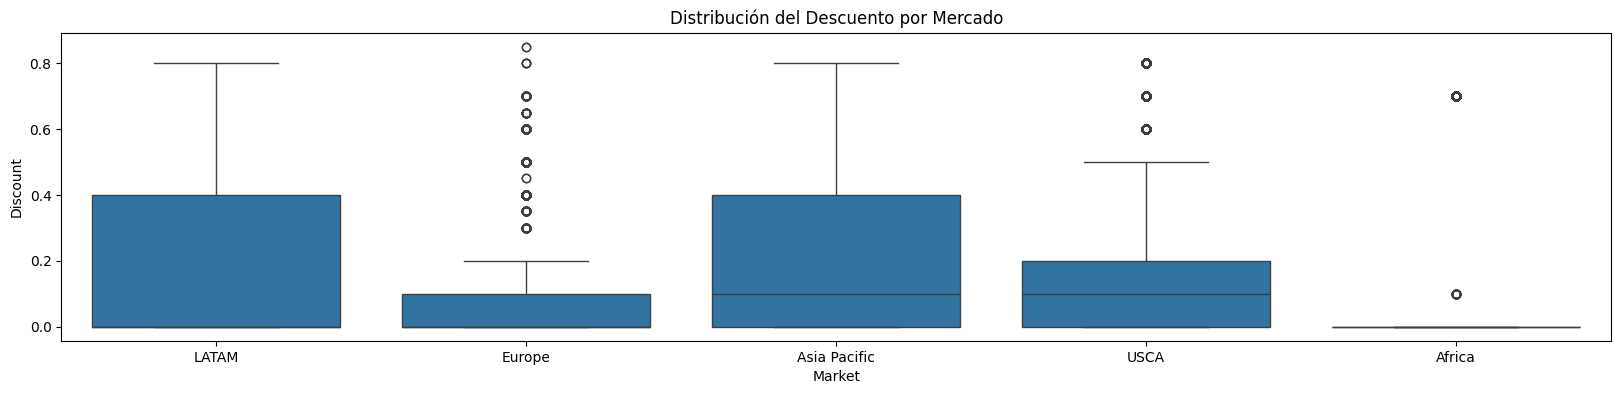

In [ ]:
plt.figure(figsize=(20,4))
sns.boxplot(x='Market', y='Discount', data=data)
plt.title('Distribución del Descuento por Mercado')
plt.show()

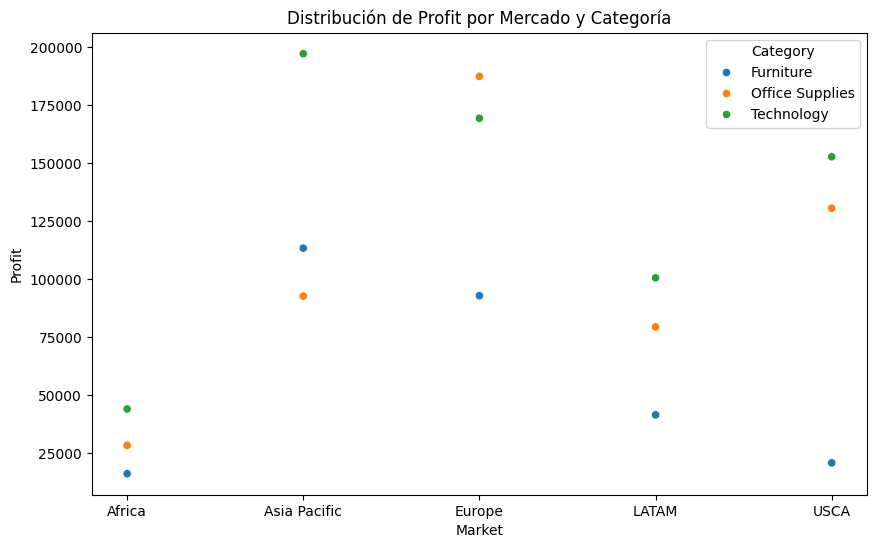

In [ ]:
# Crear subgrupos de datos
subgrouped_data = data.groupby(['Market', 'Category'])

# Crear un nuevo DataFrame para el gráfico
plot_subdata = subgrouped_data['Profit'].sum().reset_index()

# Crear el gráfico de dispersión
plt.figure(figsize=(10,6))
sns.scatterplot(x='Market', y='Profit', hue='Category', data=plot_subdata)
plt.title('Distribución de Profit por Mercado y Categoría')
plt.show()


In [ ]:
data.shape

(51290, 30)

In [ ]:
# Descargar el dataframe

filename = 'Global_supertore_procesado.csv'
data.to_csv(filename, index=False)
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>